In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd 
import numpy as np

In [85]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

### Contrôle de l'intégrité des données

In [86]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [87]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [88]:
df.shape

(5110, 12)

In [89]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [91]:
df.describe(include='object').T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


In [92]:
df.isnull().sum()/df.shape[0]*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [93]:
df.dropna(inplace=True)
df.drop(columns=['id'], inplace=True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [94]:
df.duplicated().sum()

0

In [95]:
# identifiant les valeurs inutiles (peut etre just dans les valeurs de type object)
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('***'*10)

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64
******************************
ever_married
Yes    3204
No     1705
Name: count, dtype: int64
******************************
work_type
Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: count, dtype: int64
******************************
Residence_type
Urban    2490
Rural    2419
Name: count, dtype: int64
******************************
smoking_status
never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: count, dtype: int64
******************************


### l'analyse exploratoire des données 

In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4909.0,42.865374,22.555115,0.08,25.00,44.00,60.00,82.00
hypertension,4909.0,0.091872,0.288875,0.00,0.00,0.00,0.00,1.00
heart_disease,4909.0,0.049501,0.216934,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4909.0,105.305150,44.424341,55.12,77.07,91.68,113.57,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.50,28.10,33.10,97.60
stroke,4909.0,0.042575,0.201917,0.00,0.00,0.00,0.00,1.00


In [97]:
df.describe(include='object').T

,count,unique,top,freq
gender,4909,3,Female,2897
ever_married,4909,2,Yes,3204
work_type,4909,5,Private,2811
Residence_type,4909,2,Urban,2490
smoking_status,4909,4,never smoked,1852


<Axes: title={'center': 'Stroke Vs Non Stroke'}, xlabel='stroke', ylabel='count'>

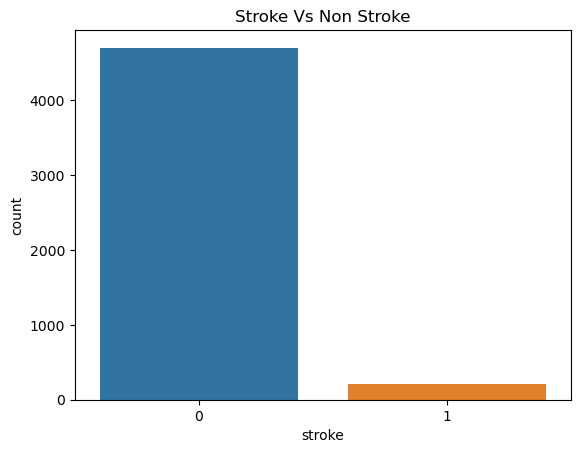

In [98]:
plt.title('Stroke Vs Non Stroke')
sns.countplot(x='stroke', data=df)
# we see that the data is inbalanced

In [100]:
df_final = df.copy()

### Balancing data method 1: 

In [32]:
df_with_0=df[df["stroke"]==0]
df_with_1=df[df["stroke"]==1]

In [33]:
df_with_0.shape, df_with_1.shape

((4700, 11), (209, 11))

In [34]:
df_with_0_final=df_with_0.sample(209)

In [84]:
df_final=pd.concat([df_with_0_final,df_with_1],axis=0)
df_final.shape

(418, 11)

### Balancing data method 2:

In [125]:
from sklearn.utils import resample

df_maj = df[df['stroke'] == 0]
df_min = df[df['stroke'] == 1]

df_min_upsampled = resample(df_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=4700,    # to match average class
                                 random_state=42) # reproducible results
df_min_upsampled.duplicated().sum()   # this method lead to overfitting on the duplicated data 

4491

In [126]:
df_final=pd.concat([df_maj,df_min_upsampled],axis=0)
df_final.shape

(9400, 11)

In [128]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
250,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
251,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
252,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
253,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
125,Female,72.0,0,0,Yes,Govt_job,Urban,131.41,28.4,never smoked,1
100,Male,64.0,0,1,Yes,Govt_job,Urban,74.10,28.8,Unknown,1
173,Female,80.0,1,0,Yes,Self-employed,Rural,91.02,32.9,formerly smoked,1
138,Male,76.0,1,0,Yes,Self-employed,Rural,194.37,27.0,formerly smoked,1


### Encoding Categorical Data

In [129]:
from sklearn.preprocessing import LabelEncoder 

encoder=LabelEncoder()
 
df_final["gender"]=encoder.fit_transform(df_final["gender"])
df_final["ever_married"]=encoder.fit_transform(df_final["ever_married"])
df_final["Residence_type"]=encoder.fit_transform(df_final["Residence_type"])
df_final["work_type"]=encoder.fit_transform(df_final["work_type"])
df_final["smoking_status"]=encoder.fit_transform(df_final["smoking_status"])

In [130]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,3.0,0,0,0,4,0,95.12,18.0,0,0
250,1,58.0,1,0,1,2,1,87.96,39.2,2,0
251,0,8.0,0,0,0,2,1,110.89,17.6,0,0
252,0,70.0,0,0,1,2,0,69.04,35.9,1,0
253,1,14.0,0,0,0,1,0,161.28,19.1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
125,0,72.0,0,0,1,0,1,131.41,28.4,2,1
100,1,64.0,0,1,1,0,1,74.10,28.8,0,1
173,0,80.0,1,0,1,3,0,91.02,32.9,1,1
138,1,76.0,1,0,1,3,0,194.37,27.0,1,1


<Axes: >

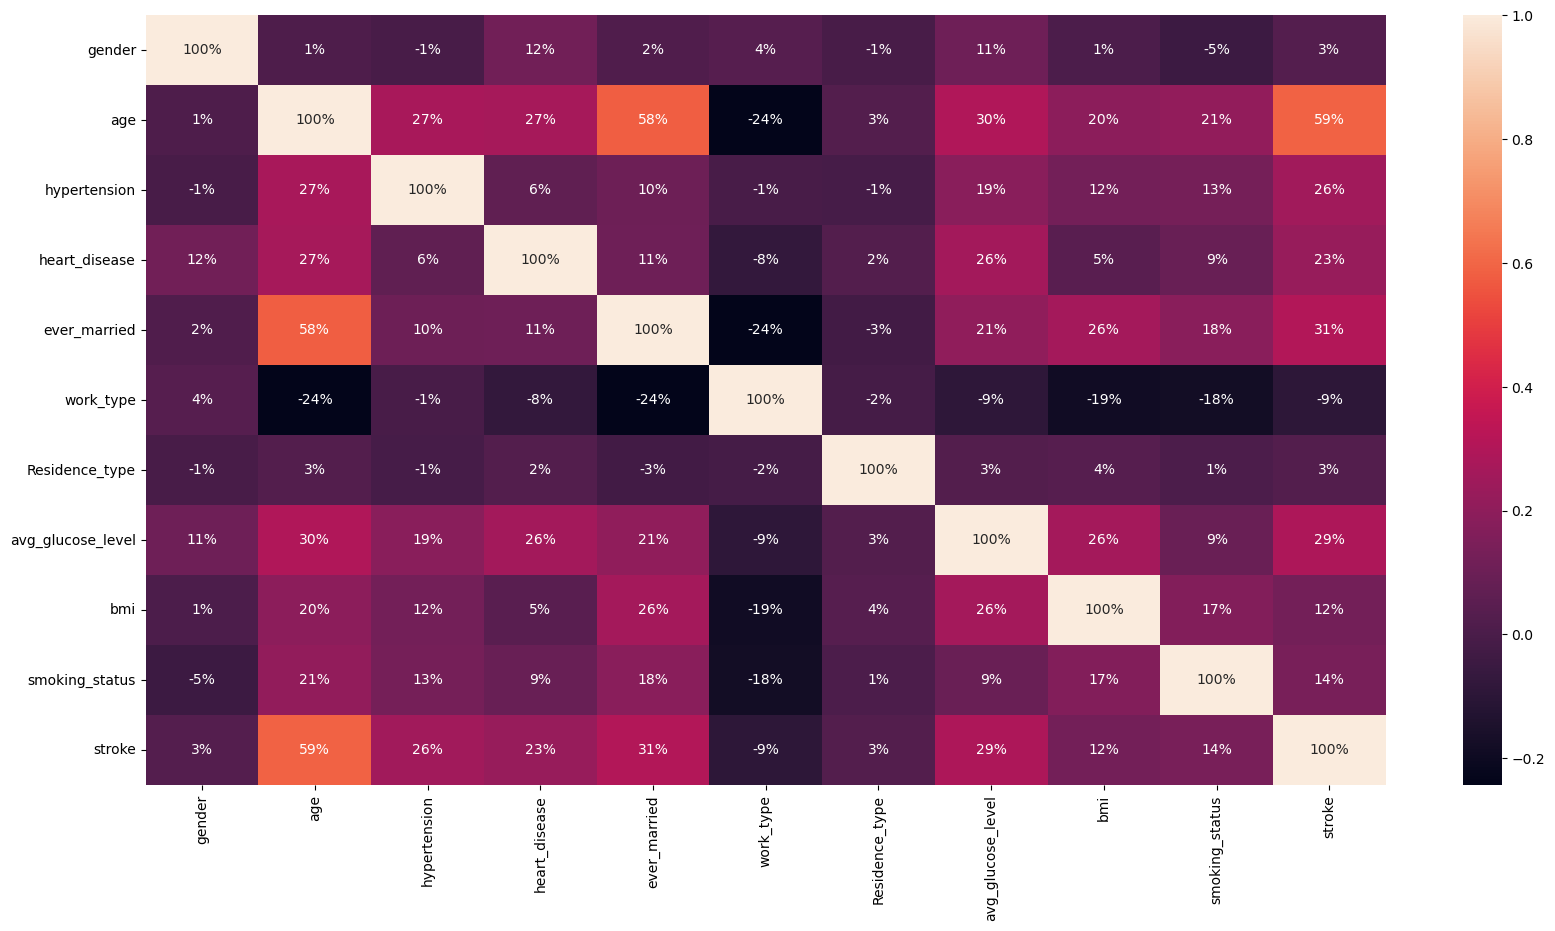

In [131]:
plt.figure(figsize=(20,10))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df_final.corr(), annot=True, fmt='.0%')

### Scaling numerical data

In [132]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ["age", "avg_glucose_level", "bmi"]

scaler = MinMaxScaler(feature_range=(0, 1))  # Set the desired range to (0, 1)

df_final[cols_to_scale] = scaler.fit_transform(df_final[cols_to_scale])

In [133]:
df_final

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
249,1,0.035645,0,0,0,4,0,0.184655,0.088202,0,0
250,1,0.707031,1,0,1,2,1,0.151602,0.331042,2,0
251,0,0.096680,0,0,0,2,1,0.257455,0.083620,0,0
252,0,0.853516,0,0,1,2,0,0.064260,0.293242,1,0
253,1,0.169922,0,0,0,1,0,0.490075,0.100802,0,0
...,...,...,...,...,...,...,...,...,...,...,...
125,0,0.877930,0,0,1,0,1,0.352184,0.207331,2,1
100,1,0.780273,0,1,1,0,1,0.087619,0.211913,0,1
173,0,0.975586,1,0,1,3,0,0.165728,0.258877,1,1
138,1,0.926758,1,0,1,3,0,0.642831,0.191294,1,1


In [134]:
inputs=df_final.drop(["stroke"],axis=1)
target=df_final["stroke"]

In [135]:
inputs.shape, target.shape

((9400, 10), (9400,))

In [136]:
def my_train_test_split(inputs, target, test_ratio=0.2, random_state=1):
    
    if random_state is not None:
        np.random.seed(random_state)
    # Shuffle indices
    indices = np.arange(len(inputs))
    np.random.shuffle(indices)
    
    # Calculate the number of samples for testing
    test_size = int(len(inputs) * test_ratio)
    
    # Split the indices into training and testing indices
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    
    # Split the data based on the indices
    X_train, X_test = inputs.iloc[train_indices], inputs.iloc[test_indices]
    y_train, y_test = target.iloc[train_indices], target.iloc[test_indices]
    
    return X_train, X_test, y_train, y_test



In [137]:
X_train, X_test, y_train, y_test = my_train_test_split(inputs, target)

In [138]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (6580, 10)
X_test shape: (2820, 10)
y_train shape: (6580,)
y_test shape: (2820,)


In [150]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('val_accuracy') >= 0.9:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True  

In [158]:
import tensorflow as tf
callback = myCallback()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(200, input_shape=[10], activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=250, batch_size=10, validation_data=(X_test, y_test), callbacks=[callback])

Epoch 1/250
658/658 [==============================] - 2s 2ms/step - loss: 0.6016 - accuracy: 0.6617 - val_loss: 0.5152 - val_accuracy: 0.7589
Epoch 2/250
658/658 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7441 - val_loss: 0.4853 - val_accuracy: 0.7660
Epoch 3/250
658/658 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7628 - val_loss: 0.4764 - val_accuracy: 0.7727
Epoch 4/250
658/658 [==============================] - 2s 2ms/step - loss: 0.4942 - accuracy: 0.7699 - val_loss: 0.4611 - val_accuracy: 0.7826
Epoch 5/250
658/658 [==============================] - 2s 3ms/step - loss: 0.4833 - accuracy: 0.7734 - val_loss: 0.4514 - val_accuracy: 0.7830
Epoch 6/250
658/658 [==============================] - 2s 2ms/step - loss: 0.4709 - accuracy: 0.7789 - val_loss: 0.4464 - val_accuracy: 0.7791
Epoch 7/250
658/658 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7792 - val_loss: 0.4420 - val_accuracy: 0.7858

Epoch 58/250
658/658 [==============================] - 2s 3ms/step - loss: 0.3584 - accuracy: 0.8327 - val_loss: 0.3214 - val_accuracy: 0.8610
Epoch 59/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3551 - accuracy: 0.8369 - val_loss: 0.3164 - val_accuracy: 0.8603
Epoch 60/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3544 - accuracy: 0.8397 - val_loss: 0.3160 - val_accuracy: 0.8745
Epoch 61/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3463 - accuracy: 0.8468 - val_loss: 0.3124 - val_accuracy: 0.8709
Epoch 62/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3441 - accuracy: 0.8473 - val_loss: 0.3057 - val_accuracy: 0.8730
Epoch 63/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8439 - val_loss: 0.3070 - val_accuracy: 0.8688
Epoch 64/250
658/658 [==============================] - 2s 3ms/step - loss: 0.3480 - accuracy: 0.8435 - val_loss: 0.3224 - val_accuracy:

Epoch 115/250
658/658 [==============================] - 2s 3ms/step - loss: 0.3191 - accuracy: 0.8596 - val_loss: 0.2857 - val_accuracy: 0.8812
Epoch 116/250
658/658 [==============================] - 2s 3ms/step - loss: 0.3188 - accuracy: 0.8588 - val_loss: 0.2779 - val_accuracy: 0.8840
Epoch 117/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8529 - val_loss: 0.2804 - val_accuracy: 0.8936
Epoch 118/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3151 - accuracy: 0.8567 - val_loss: 0.2858 - val_accuracy: 0.8713
Epoch 119/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3232 - accuracy: 0.8533 - val_loss: 0.2912 - val_accuracy: 0.8787
Epoch 120/250
658/658 [==============================] - 2s 3ms/step - loss: 0.3191 - accuracy: 0.8523 - val_loss: 0.2897 - val_accuracy: 0.8787
Epoch 121/250
658/658 [==============================] - 1s 2ms/step - loss: 0.3206 - accuracy: 0.8543 - val_loss: 0.2769 - val_ac

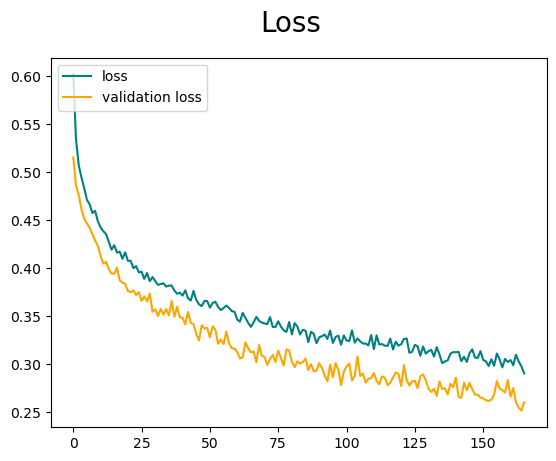

In [159]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='validation loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

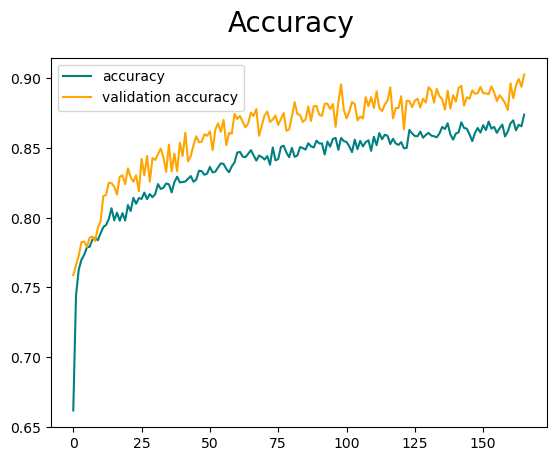

In [160]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='validation accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [155]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score

class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(10, 200)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(200, 100)
        self.dropout2 = nn.Dropout(0.6)
        self.fc3 = nn.Linear(100, 50)
        self.dropout3 = nn.Dropout(0.3)
        self.fc4 = nn.Linear(50, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = torch.sigmoid(self.fc4(x))
        return x

# Instantiate the model
model = CustomModel()

# Define loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

# Convert data to PyTorch tensors
X_train_torch = torch.FloatTensor(X_train.values)
y_train_torch = torch.FloatTensor(y_train.values.reshape(-1, 1))
X_test_torch = torch.FloatTensor(X_test.values)
y_test_torch = torch.FloatTensor(y_test.values.reshape(-1, 1))

# Training loop
epochs = 100
batch_size = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i in range(0, len(X_train), batch_size):
        inputs = X_train_torch[i:i+batch_size]
        labels = y_train_torch[i:i+batch_size]

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Compute validation accuracy
    with torch.no_grad():
        outputs = model(X_test_torch)
        predicted_labels = (outputs > 0.5).float()
        val_accuracy = accuracy_score(y_test_torch.numpy(), predicted_labels.numpy())

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss}, Validation Accuracy: {val_accuracy}")

print('Finished Training')


Epoch 1/100, Loss: 393.05774691700935, Validation Accuracy: 0.7322695035460993
Epoch 2/100, Loss: 348.66725055873394, Validation Accuracy: 0.7372340425531915
Epoch 3/100, Loss: 328.5214949250221, Validation Accuracy: 0.7659574468085106
Epoch 4/100, Loss: 323.94157391786575, Validation Accuracy: 0.7648936170212766
Epoch 5/100, Loss: 315.94812850654125, Validation Accuracy: 0.7648936170212766
Epoch 6/100, Loss: 309.9519454538822, Validation Accuracy: 0.7648936170212766
Epoch 7/100, Loss: 305.7293375059962, Validation Accuracy: 0.7826241134751774
Epoch 8/100, Loss: 300.9131042063236, Validation Accuracy: 0.7812056737588653
Epoch 9/100, Loss: 295.33270413428545, Validation Accuracy: 0.7847517730496454
Epoch 10/100, Loss: 295.6391424909234, Validation Accuracy: 0.7886524822695036
Epoch 11/100, Loss: 285.9935213699937, Validation Accuracy: 0.7886524822695036
Epoch 12/100, Loss: 283.3342796340585, Validation Accuracy: 0.7822695035460993
Epoch 13/100, Loss: 279.3482788428664, Validation Accura

In [161]:
y_pred = model.predict(X_test)

# Convert predictions to class labels (assuming binary classification)
y_pred = (y_pred > 0.5).astype(int)

89/89 [==============================] - 0s 1ms/step


In [162]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
# from your model's predictions on the validation set

# Calculate precision, recall, and F1-score for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Get the number of classes
num_classes = len(np.unique(y_test))

# Print the metrics for each class
print("Precision for each class:")
for i in range(num_classes):
    print(f"Class {i}: {precision[i]:.4f}")

print("\nRecall for each class:")
for i in range(num_classes):
    print(f"Class {i}: {recall[i]:.4f}")

print("\nF1-score for each class:")
for i in range(num_classes):
    print(f"Class {i}: {f1[i]:.4f}")

Precision for each class:
Class 0: 0.9724
Class 1: 0.8518

Recall for each class:
Class 0: 0.8281
Class 1: 0.9767

F1-score for each class:
Class 0: 0.8945
Class 1: 0.9100
